In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set()


In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       20 non-null     str  
 1   race/ethnicity               20 non-null     str  
 2   parental level of education  20 non-null     str  
 3   lunch                        20 non-null     str  
 4   test preparation course      20 non-null     str  
 5   math score                   20 non-null     int64
 6   reading score                20 non-null     int64
 7   writing score                20 non-null     int64
dtypes: int64(3), str(5)
memory usage: 1.4 KB


In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,math score,reading score,writing score
count,20.000000,20.000000,20.000000
mean,63.150000,69.600000,66.550000
std,18.644246,18.077028,19.261292
min,29.000000,34.000000,34.000000
25%,47.000000,56.500000,51.500000
50%,67.000000,68.000000,68.500000
75%,76.500000,84.750000,80.500000
max,90.000000,95.000000,96.000000


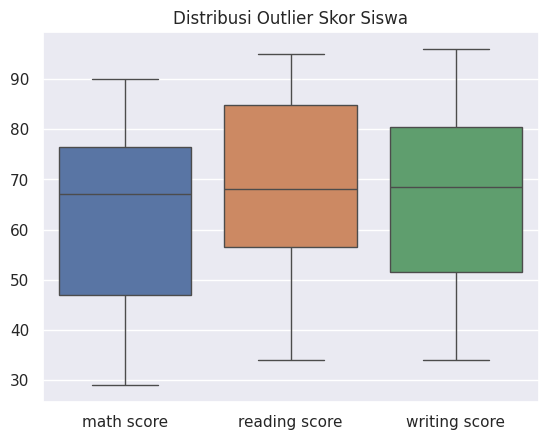

In [14]:
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.title("Distribusi Outlier Skor Siswa")
plt.show()

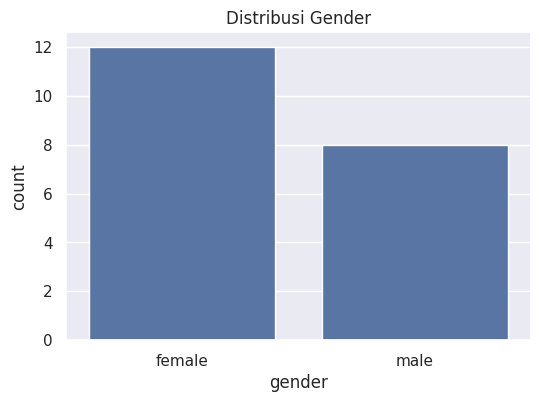

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x="gender")
plt.title("Distribusi Gender")
plt.show()

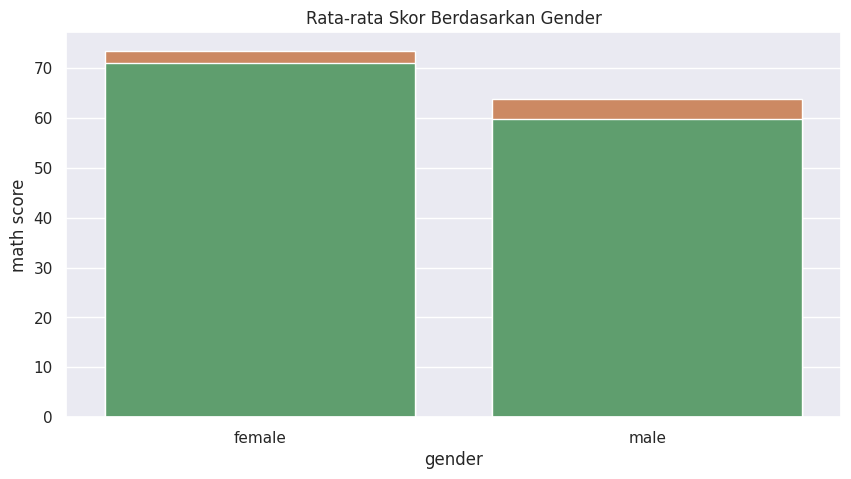

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="gender", y="math score", errorbar=None)
sns.barplot(data=df, x="gender", y="reading score", errorbar=None)
sns.barplot(data=df, x="gender", y="writing score", errorbar=None)
plt.title("Rata-rata Skor Berdasarkan Gender")
plt.show()


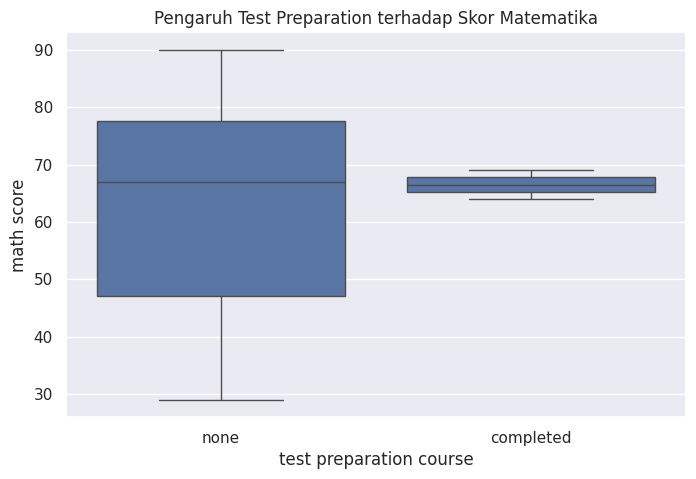

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="test preparation course", y="math score")
plt.title("Pengaruh Test Preparation terhadap Skor Matematika")
plt.show()

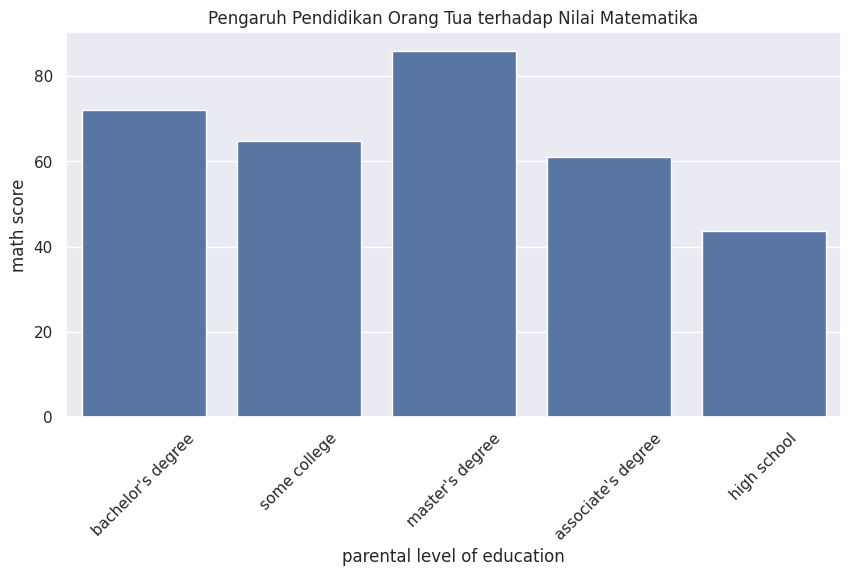

In [28]:
#Apakah ada hubungan antara parental education dan skor siswa?
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="parental level of education", y="math score", errorbar=None)
plt.xticks(rotation=45)
plt.title("Pengaruh Pendidikan Orang Tua terhadap Nilai Matematika")
plt.show()

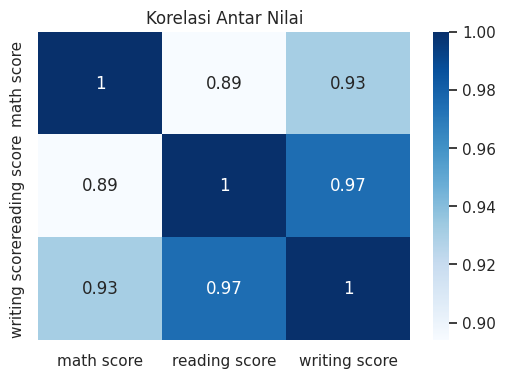

In [29]:
#Siswa dari ras/etnis mana yang memiliki nilai rata-rata tertinggi?
plt.figure(figsize=(6,4))
sns.heatmap(df[['math score','reading score','writing score']].corr(), annot=True, cmap="Blues")
plt.title("Korelasi Antar Nilai")
plt.show()

# Kesimpulan Akhir

1. Dataset bersih: tidak ada missing values dan tidak ada duplikasi.
2. Terdapat outlier pada nilai matematika, terutama skor rendah.
3. Siswa perempuan unggul dalam reading & writing, laki-laki sedikit unggul pada math.
4. Test preparation course meningkatkan skor ketiga mata pelajaran.
5. Tingkat pendidikan orang tua berkorelasi positif dengan prestasi akademik.
6. Korelasi kuat antara reading dan writing menunjukkan kemampuan bahasa yang saling terkait.